In [1]:
import numpy as np
from viznet import (
    connecta2a,
    node_sequence,
    NodeBrush,
    EdgeBrush,
    DynamicShow,
    connect121,
)
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def _format():
    plt.axis("off")
    plt.axis("equal")


OUTPUT_FOLDER = Path("selfmade_images")

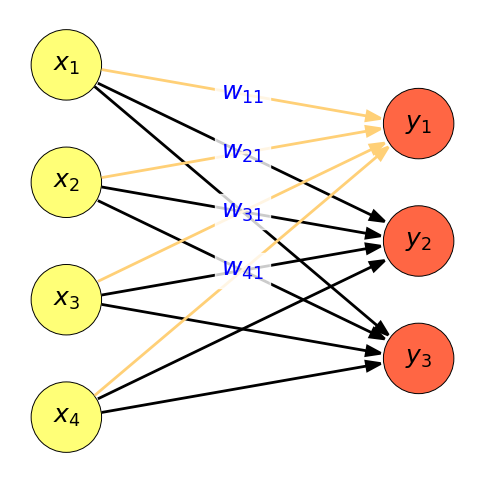

In [3]:
def space_center(direction):
    match direction:
        case "left":
            space = (0, -1)
            center_dir = (-1, 0)
        case "right":
            space = (0, -1)
            center_dir = (1, 0)
        case "up":
            space = (1, 0)
            center_dir = (0, 1)
        case "down":
            space = (1, 0)
            center_dir = (0, -1)

    return np.array(space), np.array(center_dir)


def draw_feed_forward(nodes_list, edges_list, direction="right"):
    """
    Draw a feed forward neural network.

    Args:
            nodes_list (list<list<str>>): names of the nodes in each layer.
            direction (str): the forward direction. Can be "left", "right", "up" or "down".
    """
    space, center_dir = space_center(direction)

    num_hidden_layer = len(nodes_list) - 2
    kind_list = ["nn.input"] + ["nn.hidden"] * num_hidden_layer + ["nn.output"]
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    pos_list = (
        3
        * np.arange(len(nodes_list)).reshape((-1, 1))
        @ np.array(center_dir).reshape((1, -1))
    )

    seq_list = []
    for nodes_names, kind, radius, x_y in zip(
        nodes_list, kind_list, radius_list, pos_list
    ):
        n = len(nodes_names)
        b = NodeBrush(kind)
        new_nodes = node_sequence(b, n, center=x_y, space=space)
        for node_name, new_node in zip(nodes_names, new_nodes):
            new_node.text(node_name, "center", fontsize=18)
        seq_list.append(new_nodes)

    eb_normal = EdgeBrush("-->", lw=2)
    eb_forward = EdgeBrush("-->", color="#ffd077", lw=2)

    forward_edges = [set() for _ in range(len(seq_list) - 1)]
    forward_text = [{} for _ in range(len(seq_list) - 1)]
    for layer_i, s_i, e_i, edge_text in edges_list:
        forward_edges[layer_i].add((s_i, e_i))
        forward_text[layer_i][(s_i, e_i)] = edge_text

    edges = []
    for layer_i, (st, et) in enumerate(zip(seq_list[:-1], seq_list[1:])):
        for s_i, s in enumerate(st):
            edges_s = []
            for e_i, e in enumerate(et):
                if (s_i, e_i) in forward_edges[layer_i]:
                    edges_s.append(connecta2a([s], [e], eb_forward)[0])
                    edges_s[-1].text(
                        forward_text[layer_i][(s_i, e_i)],
                        position="center",
                        fontsize=18,
                        color="blue",
                        backgroundcolor=("white", 0.8),
                    )
                else:
                    edges_s.append(connecta2a([s], [e], eb_normal))

            edges.append(edges_s)


nodes = [["$x_1$", "$x_2$", "$x_3$", "$x_4$"], ["$y_1$", "$y_2$", "$y_3$"]]
edges = [
    (0, 0, 0, "$w_{11}$"),
    (0, 1, 0, "$w_{21}$"),
    (0, 2, 0, "$w_{31}$"),
    (0, 3, 0, "$w_{41}$"),
]
plt.figure(figsize=(6, 6))
draw_feed_forward(nodes, edges, "right")
_format()
plt.savefig(OUTPUT_FOLDER / "feed_forward.svg", bbox_inches="tight")
plt.show()

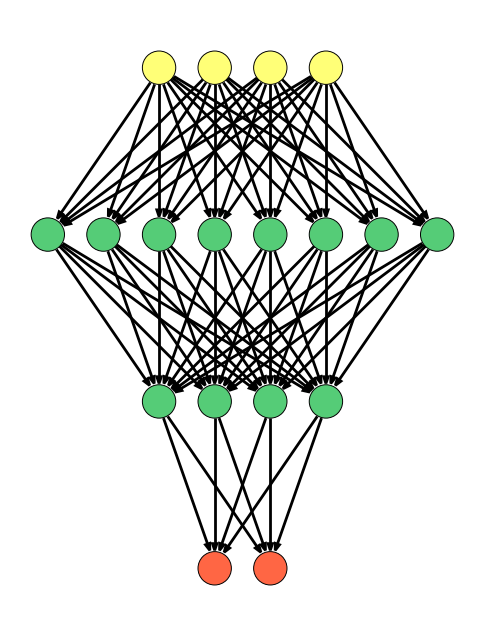

In [19]:
layers = [4, 8, 4, 2]
nodes = [["" for _ in range(n)] for n in layers]
edges = []
plt.figure(figsize=(6, 8))
draw_feed_forward(nodes, edges, "down")
_format()
plt.savefig(OUTPUT_FOLDER / "feed_forward_basic.svg", bbox_inches="tight")
plt.show()

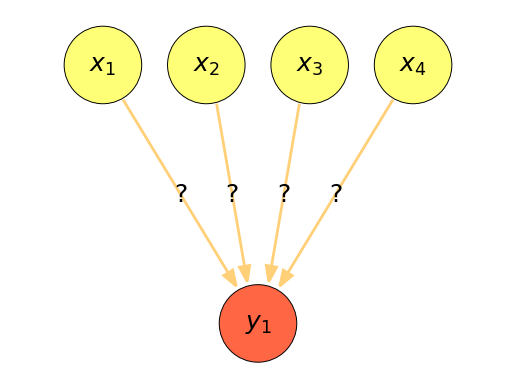

In [24]:
input_nodes_names = [f"$x_{i}$" for i in range(1, 5)]
output_nodes_names = [f"$y_{i}$" for i in range(1, 2)]
direction = "down"

space, center_dir = space_center(direction)
space = 0.8 * space
center_output = 2 * center_dir

input_brush = NodeBrush("nn.input")
output_brush = NodeBrush("nn.output")
input_nodes = node_sequence(
    input_brush, len(input_nodes_names), center=(0, 0), space=space
)
output_nodes = node_sequence(
    output_brush, len(output_nodes_names), center=center_output, space=space
)
for node_name, new_node in zip(input_nodes_names, input_nodes):
    new_node.text(node_name, "center", fontsize=18)
for node_name, new_node in zip(output_nodes_names, output_nodes):
    new_node.text(node_name, "center", fontsize=18)
eb_hidden = EdgeBrush("-->", color="gray", lw=1)
eb_forward = EdgeBrush("-->", color="#ffd077", lw=2)
for i, output_node in enumerate(output_nodes):
    if i == 0:
        eb = eb_forward
    else:
        eb = eb_hidden
    edges = connecta2a(input_nodes, [output_node], eb)
    if i == 0:
        for i, edge in enumerate(edges):
            edge.text("?", position="center", fontsize=18)
_format()
plt.savefig(OUTPUT_FOLDER / "architecture_no_weights.svg", bbox_inches="tight")
plt.show()

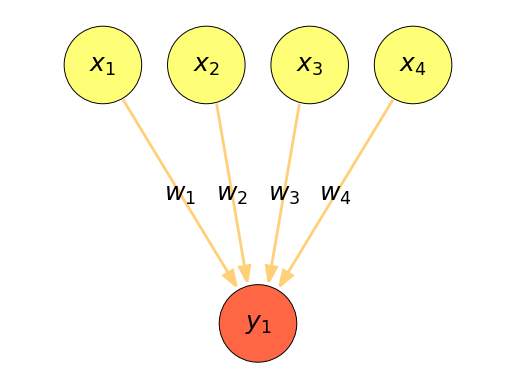

In [25]:
input_nodes_names = [f"$x_{i}$" for i in range(1, 5)]
output_nodes_names = [f"$y_{i}$" for i in range(1, 2)]
direction = "down"

input_brush = NodeBrush("nn.input")
output_brush = NodeBrush("nn.output")
input_nodes = node_sequence(
    input_brush, len(input_nodes_names), center=(0, 0), space=space
)
output_nodes = node_sequence(
    output_brush, len(output_nodes_names), center=center_output, space=space
)

for node_name, new_node in zip(input_nodes_names, input_nodes):
    new_node.text(node_name, "center", fontsize=18)
for node_name, new_node in zip(output_nodes_names, output_nodes):
    new_node.text(node_name, "center", fontsize=18)
eb_hidden = EdgeBrush("-->", color="gray", lw=1)
eb_forward = EdgeBrush("-->", color="#ffd077", lw=2)
for i, output_node in enumerate(output_nodes):
    if i == 0:
        eb = eb_forward
    else:
        eb = eb_hidden
    edges = connecta2a(input_nodes, [output_node], eb)
    if i == 0:
        for i, edge in enumerate(edges):
            edge.text(f"$w_{i+1}$", position="center", fontsize=18)
_format()
plt.savefig(OUTPUT_FOLDER / "weights_guess_architecture_dense.svg", bbox_inches="tight")
plt.show()

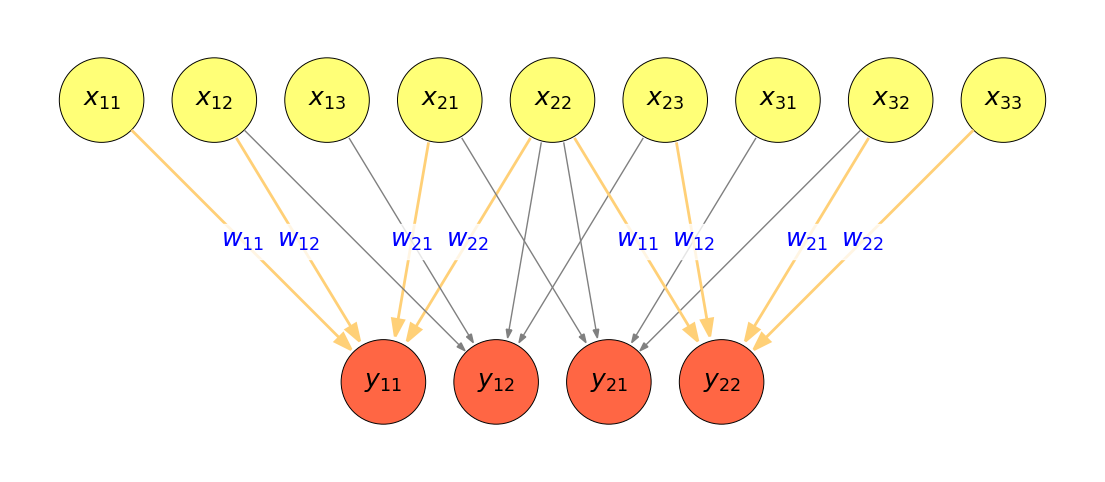

In [32]:
plt.figure(figsize=(14, 6))
rows = 3
cols = 3
rows2 = rows - 1
cols2 = cols - 1
input_nodes_names = [
    f"$x_{{{i} {j}}}$" for i in range(1, rows + 1) for j in range(1, cols + 1)
]
output_nodes_names = [
    f"$y_{{{i} {j}}}$" for i in range(1, rows2 + 1) for j in range(1, cols2 + 1)
]
input_brush = NodeBrush("nn.input")
output_brush = NodeBrush("nn.output")
input_nodes = node_sequence(
    input_brush, len(input_nodes_names), center=(0, 0), space=space
)
output_nodes = node_sequence(
    output_brush, len(output_nodes_names), center=center_output, space=space
)
for node_name, new_node in zip(input_nodes_names, input_nodes):
    new_node.text(node_name, "center", fontsize=18)
for node_name, new_node in zip(output_nodes_names, output_nodes):
    new_node.text(node_name, "center", fontsize=18)
eb_hidden = EdgeBrush("-->", color="gray", lw=1)
eb_forward = EdgeBrush("-->", color="#ffd077", lw=2)
input_nodes_array = np.array(input_nodes).reshape(rows, cols)
for i, output_node in enumerate(output_nodes):
    if i == 0 or i == len(output_nodes) - 1:
        eb = eb_forward
    else:
        eb = eb_hidden
    row = i // cols2
    col = i % cols2
    edges = connecta2a(
        input_nodes_array[row : row + 2, col : col + 2].flat, [output_node], eb
    )
    if i == 0 or i == len(output_nodes) - 1:
        for i, edge in enumerate(edges):
            edge.text(
                f"$w_{{{i//2+1}{i%2+1}}}$",
                position="center",
                fontsize=18,
                color="blue",
                backgroundcolor=("white", 0.8),
            )
_format()
plt.savefig(OUTPUT_FOLDER / "conv.svg", bbox_inches="tight")
plt.show()

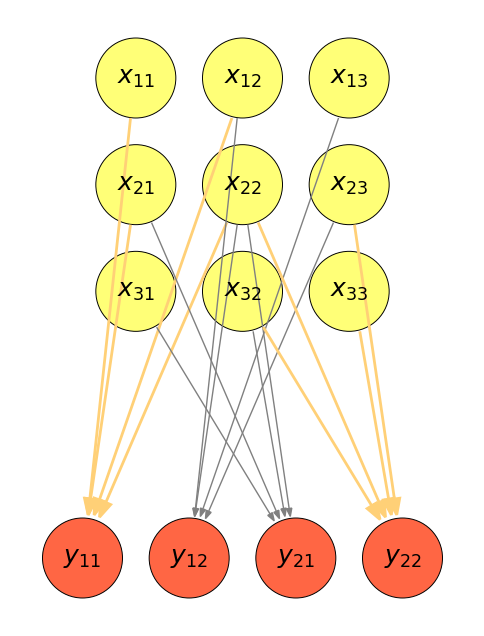

In [47]:
plt.figure(figsize=(6, 8))
rows = 3
cols = 3
rows2 = rows - 1
cols2 = cols - 1
input_nodes_names = [
    f"$x_{{{i} {j}}}$" for i in range(1, rows + 1) for j in range(1, cols + 1)
]
output_nodes_names = [
    f"$y_{{{i} {j}}}$" for i in range(1, rows2 + 1) for j in range(1, cols2 + 1)
]
input_brush = NodeBrush("nn.input")
output_brush = NodeBrush("nn.output")
centers = [(0, 0), (-space[1], -space[0]), (-2 * space[1], -2 * space[0])]
input_nodes = []
for center in centers:
    input_nodes.extend(node_sequence(input_brush, 3, center=center, space=space))

output_nodes = node_sequence(
    output_brush,
    len(output_nodes_names),
    center=center_output + centers[-1],
    space=space,
)
for node_name, new_node in zip(input_nodes_names, input_nodes):
    new_node.text(node_name, "center", fontsize=18)
for node_name, new_node in zip(output_nodes_names, output_nodes):
    new_node.text(node_name, "center", fontsize=18)
eb_hidden = EdgeBrush("-->", color="gray", lw=1)
eb_forward = EdgeBrush("-->", color="#ffd077", lw=2)
input_nodes_array = np.array(input_nodes).reshape(rows, cols)
for i, output_node in enumerate(output_nodes):
    if i == 0 or i == len(output_nodes) - 1:
        eb = eb_forward
    else:
        eb = eb_hidden
    row = i // cols2
    col = i % cols2
    edges = connecta2a(
        input_nodes_array[row : row + 2, col : col + 2].flat, [output_node], eb
    )
    # if i == 0 or i == len(output_nodes) - 1:
    #     for i, edge in enumerate(edges):
    #         edge.text(
    #             f"$w_{{{i//2+1}{i%2+1}}}$",
    #             position="center",
    #             fontsize=18,
    #             color="blue",
    #             backgroundcolor=("white", 0.8),
    #         )
_format()
plt.savefig(OUTPUT_FOLDER / "conv_real_input.svg", bbox_inches="tight")
plt.show()

$x_{1,1}$
$x_{1,2}$
$x_{1,3}$
$x_{2,1}$
$x_{2,2}$
$x_{2,3}$
$x_{3,1}$
$x_{3,2}$
$x_{3,3}$
$y_{1,1}$
$y_{1,2}$
$y_{2,1}$
$y_{2,2}$
st = array([[<viznet.edgenode.Node object at 0x7d86a47a97c0>,
        <viznet.edgenode.Node object at 0x7d86a6f1da30>]], dtype=object)
et = array([[<viznet.edgenode.Node object at 0x7d86aa9b3080>,
        <viznet.edgenode.Node object at 0x7d86a9f03920>]], dtype=object)
st = array([[<viznet.edgenode.Node object at 0x7d86a47a97c0>,
        <viznet.edgenode.Node object at 0x7d86a6f1da30>]], dtype=object)
et = array([[<viznet.edgenode.Node object at 0x7d86aa9b3080>,
        <viznet.edgenode.Node object at 0x7d86a9f03920>]], dtype=object)
st = array([[<viznet.edgenode.Node object at 0x7d86a47a97c0>,
        <viznet.edgenode.Node object at 0x7d86a6f1da30>]], dtype=object)
et = array([[<viznet.edgenode.Node object at 0x7d86aa9b3080>,
        <viznet.edgenode.Node object at 0x7d86a9f03920>]], dtype=object)
st = array([[<viznet.edgenode.Node object at 0x7d86a47a97c0>

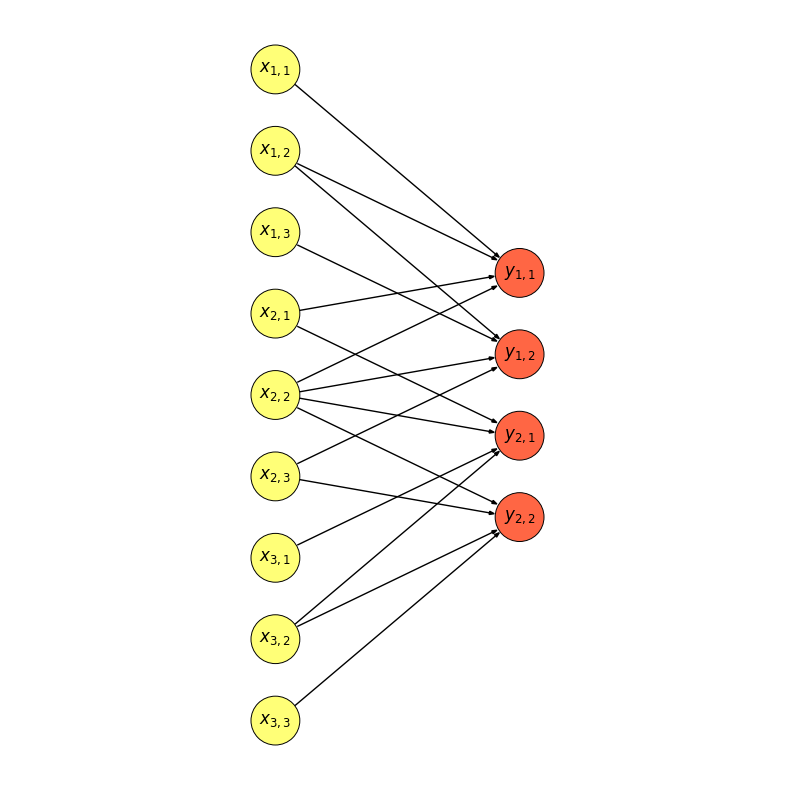

In [27]:
def draw_convolutional(
    input_shape: tuple[int, int],
    kernel_sizes: list[int],
    nodes_names: list[str],
    direction="right",
):
    """
    Draw a convolutional neural network.

    Args:
            nodes_names (list<str>): formats of names of the nodes in each layer.
            direction (str): the forward direction. Can be "left", "right", "up" or "down".
    """
    if len(nodes_names) != len(kernel_sizes) + 1:
        raise ValueError(
            f'You should have "len(nodes_names) != len(kernel_sizes) + 1" but {len(nodes_names) = } and {len(kernel_sizes) + 1 = }'
        )

    match direction:
        case "left":
            space = (0, -1)
            center_dir = (-1, 0)
        case "right":
            space = (0, -1)
            center_dir = (1, 0)
        case "up":
            space = (1, 0)
            center_dir = (0, 1)
        case "down":
            space = (1, 0)
            center_dir = (0, -1)

    num_layers = len(nodes_names)
    num_hidden_layer = num_layers - 2
    kind_list = ["nn.input"] + ["nn.hidden"] * num_hidden_layer + ["nn.output"]
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    pos_list = (
        3
        * np.arange(num_layers).reshape((-1, 1))
        @ np.array(center_dir).reshape((1, -1))
    )

    # Compute the number of cells per layer
    seq_n_m = [[input_shape[0], input_shape[1]]]
    for kernel_size in kernel_sizes:
        previous_n_nodes = seq_n_m[-1]
        n_rows = previous_n_nodes[0] - kernel_size + 1
        n_cols = previous_n_nodes[1] - kernel_size + 1
        seq_n_m.append([n_rows, n_cols])

    seq_list = []
    for n_m, nodes_names_format, kind, radius, x_y in zip(
        seq_n_m, nodes_names, kind_list, radius_list, pos_list
    ):
        num_nodes = n_m[0] * n_m[1]
        b = NodeBrush(kind, size=radius)
        new_nodes = node_sequence(b, num_nodes, center=x_y, space=space)
        for idx, new_node in enumerate(new_nodes, start=0):
            i = (idx // n_m[1]) + 1
            j = (idx % n_m[1]) + 1
            node_name = nodes_names_format.format(f"{i},{j}")
            print(node_name)
            new_node.text(node_name, "center")
        new_nodes = np.array(new_nodes).reshape(n_m)
        seq_list.append(new_nodes)

    eb = EdgeBrush("-->")
    for st, et, kernel_size in zip(seq_list[:-1], seq_list[1:], kernel_sizes):
        for i in range(et.shape[0]):
            for j in range(et.shape[1]):
                print(f"{st = }")
                print(f"{et = }")
                st_subset = list(st[i : i + kernel_size, j : j + kernel_size].flat)
                connecta2a(st_subset, [et[i, j]], eb)


input_shape = (3, 3)
kernel_sizes = [2]
nodes_names = ["$x_{{{}}}$", "$y_{{{}}}$"]
direction = "right"

plt.figure(figsize=(10, 10))
draw_convolutional(input_shape, kernel_sizes, nodes_names, direction)
_format()
plt.show()